# **1.- Modelo de Regression Lineal**

**Introducción**

Para trabajar en estos conceptos, utlizaremos el dataset [Resistencia del Hormigon](https://www.kaggle.com/datasets/maajdl/yeh-concret-data/) que utlizaremos para nuestro modelo.

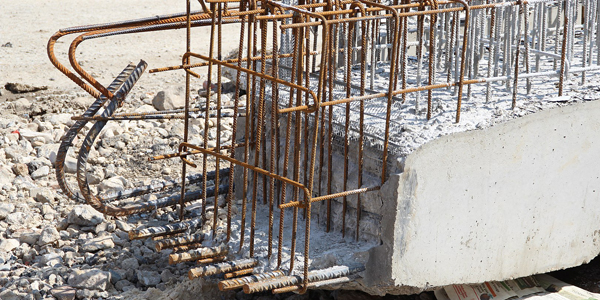

**Acerca del conjunto de datos**

**Contexto**

**Resumen**
El hormigon es el material más importante en la ingenieria civil.

La resistencia a la compresión es una función alatamente no lineal de la edad y los ingredientes.

**Contenido**

**Conjunto de datos de resistencia a la compresión del hormigon**

**Información del conjunto de datos:**

Número de instancias: 1030
Número de atributos: 9
Valores de atributos faltantes: Ninguno

**Información de atributos**
Se proporcionan el nombre de la variable, el tipo de variable, la unidad de medida y una breve descripción. La resistencia a la compresión del hormigón es el problema de regresión. El orden de este listado corresponde al orden de los números a lo largo de las filas de la base de datos.

*Nombre - Tipo de datos - Medición*

* Cemento  -- cuantitativo -- kg en una mezcla de m3 
* Escoria de alto horno  -- cuantitativa -- kg en una mezcla de m3 
* Cenizas volantes  -- cuantitativa - - kg en m3 de mezcla 
* Agua -- cuantitativo - kg en m3 de mezcla 
* Superplastificante  - cuantitativa - kg en m3 de mezcla 
* Agregado Grueso -- cuantitativo -- kg en una mezcla de m3 
* Agregado fino -- cuantitativo -- kg en una mezcla de m3 
* Edad -- cuantitativa -- Día (1~365) 
* Resistencia a la compresión del hormigón -- cuantitativa -- MPa 

Primero importemos nuestra librerias

In [109]:
import numpy as np
from scipy.stats import norm 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Ahora carguemos nuestro dataset a aplicar

In [110]:
hormigon = pd.read_csv('https://raw.githubusercontent.com/llanosrenzo/MachineLearning/main/Regresion/Concrete_Data_Yeh.csv',sep = ';', )
hormigon

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Observemos las columnas, tipo de datos y datos nulos

In [111]:
hormigon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [112]:
hormigon.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Analizemos la relacion lineal de nuestras variables indenpientes o regresoras con respecto a la variable respuesta o dependiente

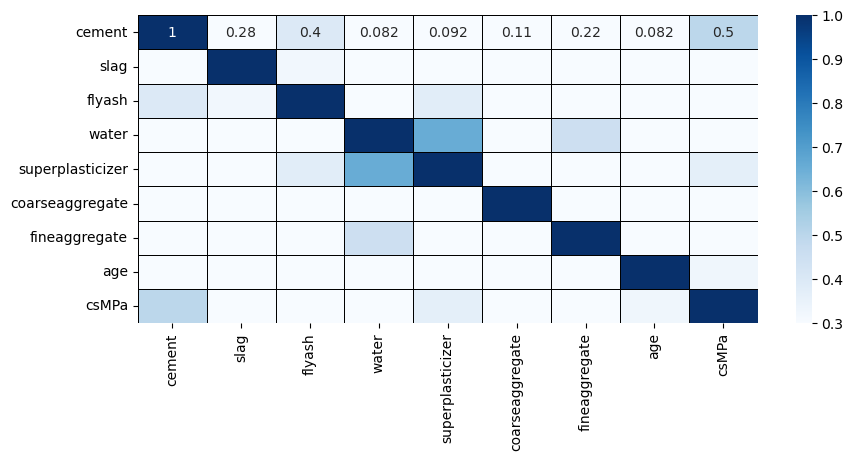

In [113]:
fig , ax = plt.subplots(figsize = (10,4))
sns.heatmap(hormigon.corr().abs(),annot=True,cmap = 'Blues',
            vmin = 0.3,vmax = 1,
            linewidths = 0.5,linecolor = 'black',
            cbar = True)
plt.show()

De acuerdo al grafico anterior, observamos que la variable cemento(cement)  tiene la mayor correlacion con la variable respuesta.

https://python-charts.com/es/correlacion/pairplot-seaborn/

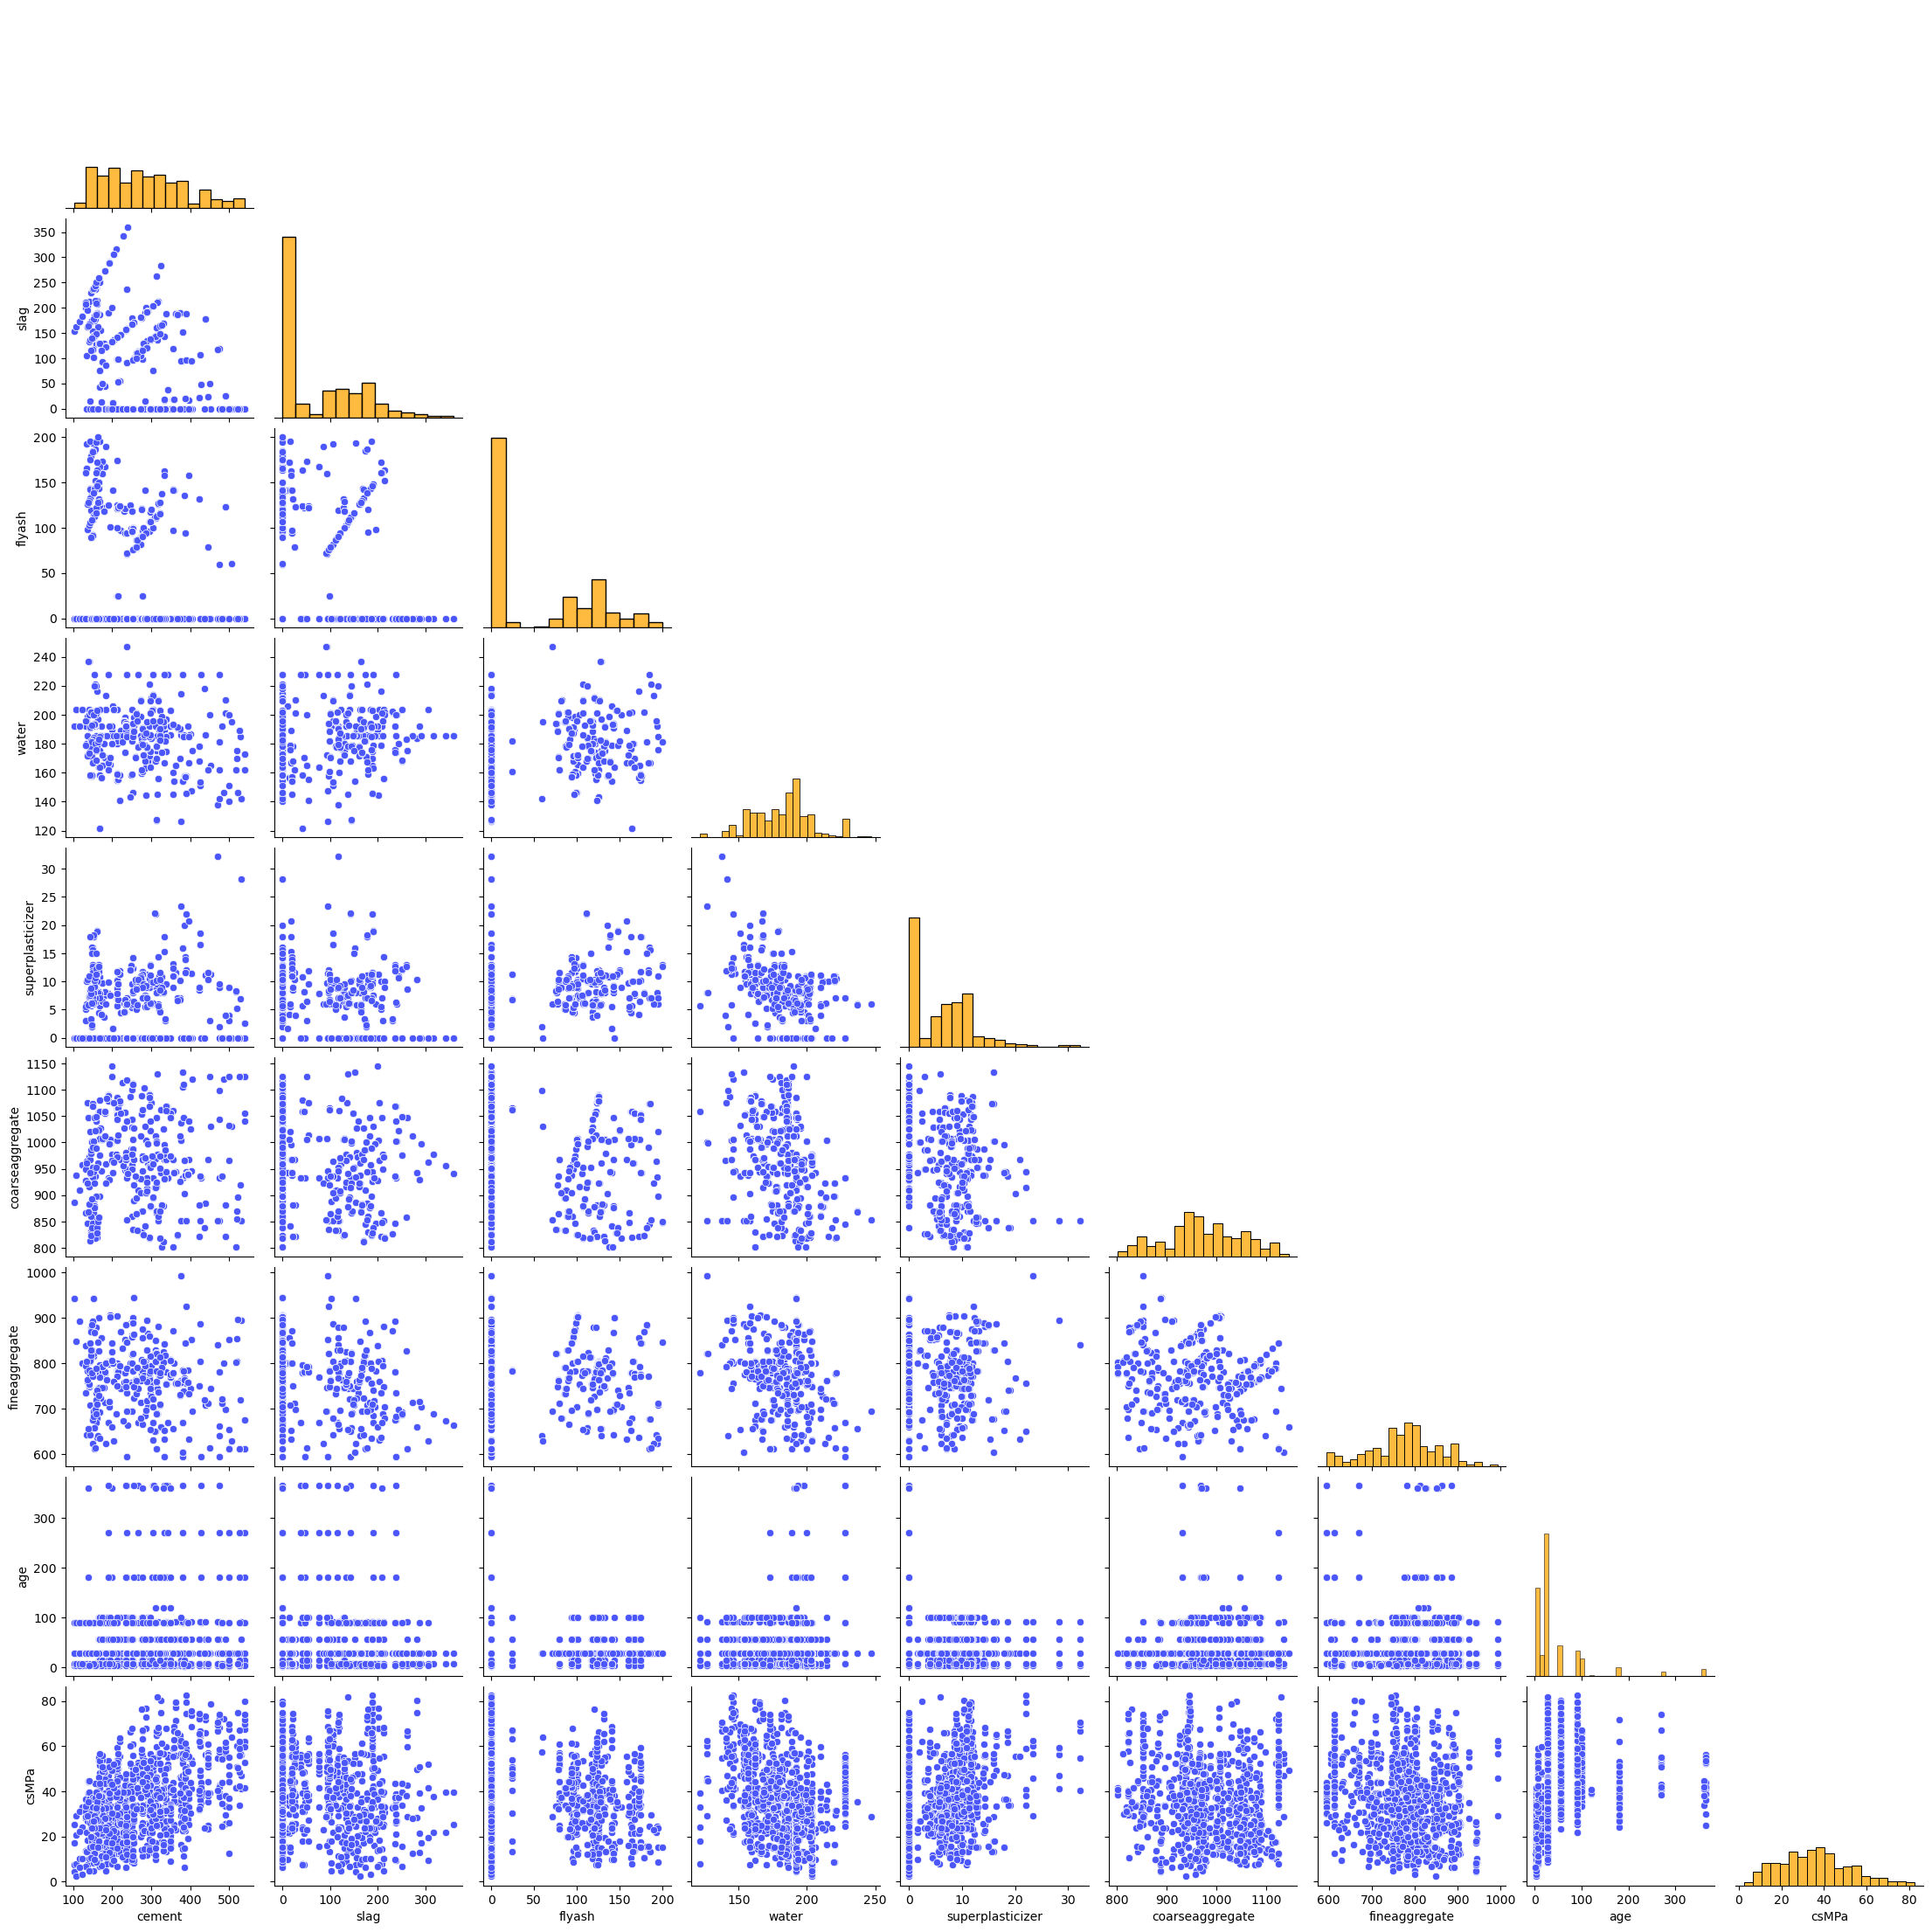

In [114]:
sns.pairplot(hormigon,
             plot_kws = {'color':'#4B57FA','marker':'o'},# Modificar los estilos de los graficos de los paneles inferior y superior
             diag_kws = {'color':'orange'}, # Personalizar el estilo de la diagonal
            corner = True) # Elimina el panel supèrior
plt.show()

Nos muestra una mayor informacion  y visualizacion con respecto a la matriz de correlaciòn, donde las variables cemento y resitencia a la compresion de hormigon nos muestra una posible relacion lineal.

Para observarlo más facilmente, grafiquemos al cemento en nuestro eje $x$ *(valor predictor o valor independiente)* y la resistencia a la compresion de hormigon  $y$ *(valor a predecir o valor dependiente)*.

In [161]:
var_dep = 'Resitencia a la compresión de hormigon'
var_ind = 'Cemento'

$$ y = \beta_0 + \beta_1x$$

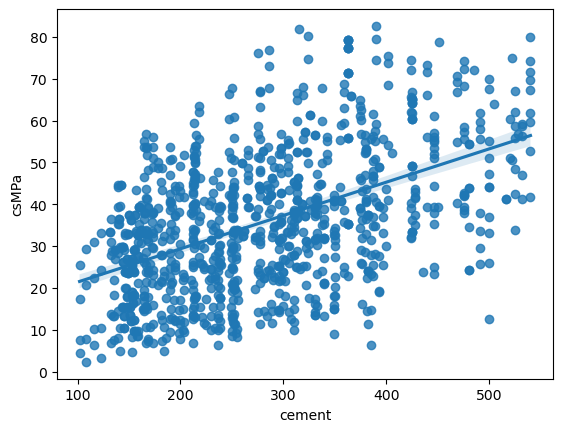

In [115]:
sns.regplot(x = hormigon['cement'],y= hormigon['csMPa'])
plt.show()

* **Regla de Sturges**
La formula de la regla de Sturges es una formula matematica que te permite calcular el número de clases de manera precisa.

$$k = 1 + 3.3{\log}_{10}n$$

Donde $k$ es el número de clases y $n$ es el tamaño de la muestra(es decir, el número de datos en el conjunto de datos)

In [116]:
num_intervalos = 1 + 3.3*np.log10(len(hormigon))
num_intervalos

10.942362841527068

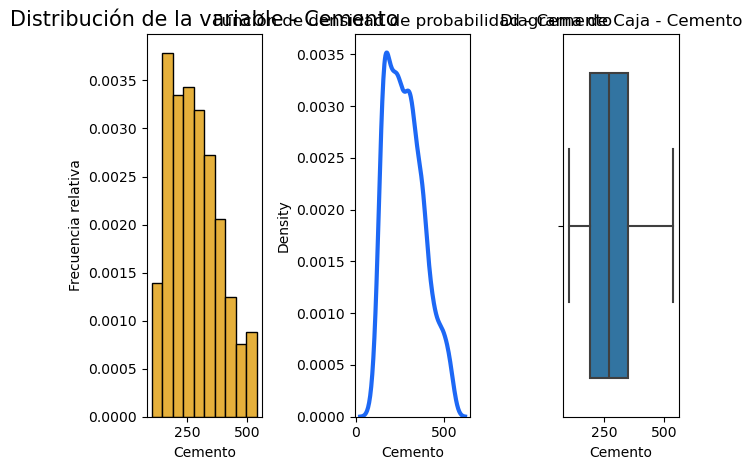

In [117]:
fig , ax = plt.subplots(nrows = 1,ncols = 3)

ax[0].hist(hormigon['cement'],edgecolor = 'black',bins = int(num_intervalos),
           color = '#E5B03B',
           density = True)
ax[0].set_xlabel('Cemento')
ax[0].set_ylabel('Frecuencia relativa')
ax[0].set_title('Distribución de la variable - Cemento',fontsize = 15)

sns.kdeplot(data = hormigon,x = 'cement',ax = ax[1],
            color = '#1D68F5',
            linewidth = 3 #Ancho de la línea
            )
ax[1].set_title('Función de densidad de probabilidad - Cemento')
ax[1].set_xlabel('Cemento')
ax[1].grid(False)

sns.boxplot(data = hormigon,x = 'cement',ax = ax[2])
ax[2].set_title('Diagrama de Caja - Cemento')
ax[2].set_xlabel('Cemento')

plt.tight_layout()
plt.show()

In [118]:
X = hormigon['csMPa']
y = hormigon['cement']
X_train, X_test , y_train , y_test = train_test_split(X.values.reshape(-1,1),y.values.reshape(-1,1),train_size = 0.8,random_state = 123,shuffle = True)


## **1.1 Modelo de regresión lineal simple**

$$y = \beta_0 + \beta_1x + \epsilon$$

Estimación de parametros

$\hat{\beta}_1$

$$\hat{\beta}_1 = \frac{\sum {y_i x_i} - \frac {(\sum y_i)(\sum x_i)}{n}}{\sum {x_i^2} - \frac{(\sum {x_i})^2}{n}} \tag{1.7}$$

In [119]:
beta_est_1 = (sum(X_train*y_train) - ((sum(y_train)*sum(X_train))/len(X_train)))/(sum(X_train**2) - ((sum(X_train)**2)/len(X_train)))
beta_est_1 = beta_est_1[0]
beta_est_1

3.0635940891370526

$\hat{\beta}_0$

$$\hat{\beta}_0 = \overline{y} - \hat{\beta}_1\overline{x} \tag{1.6}$$

In [120]:
beta_est_0 = np.mean(y_train) - beta_est_1*(np.mean(X_train))
beta_est_0

170.5113781299794

Entonces el **modelo ajustado de regresión lineal simple** es:

$$\hat{y} = 170.5114 + 3.064*{x}$$

In [121]:
y_ajust_train = beta_est_0 + beta_est_1*(X_train)
y_ajust_train

array([[218.57916939],
       [280.37186217],
       [305.73842122],
       [211.44099516],
       [250.59372762],
       [228.44394236],
       [396.2982625 ],
       [283.37418437],
       [295.68983261],
       [180.68251051],
       [258.37525661],
       [239.44224514],
       [189.75074901],
       [218.08899433],
       [245.41625361],
       [280.34122623],
       [252.98333101],
       [207.82595414],
       [256.59837203],
       [291.82970406],
       [285.18170489],
       [284.38517042],
       [247.07059442],
       [297.03781401],
       [413.4543894 ],
       [335.82291518],
       [283.25164061],
       [260.06023336],
       [263.12382744],
       [331.19688811],
       [214.62713301],
       [232.64106626],
       [306.90258698],
       [268.69956869],
       [328.96046442],
       [292.13606347],
       [278.65624948],
       [346.97439766],
       [247.34631789],
       [294.89329815],
       [286.3152347 ],
       [293.51468081],
       [358.12588015],
       [217

Tenemos la suma corregida de cuadrados de las $x_i$

 $$S_{xx}= \sum_{i=1}^{n} {x_i^2} - \frac{(\sum_{i=1}^{n} {x_i})^2}{n}$$

In [142]:
Sxx_train = np.sum((X_train - np.mean(X_train))**2)
Sxx_train

230534.64814174757

La suma corregida de los productos cruzados de $x_i$ y $y_i$

$$S_{xy} = \sum_{i=1}^{n} {y_i x_i} - \frac{(\sum_{i=1}^{n} {y_i})(\sum_{i=1}^{n} {x_i})}{n} = \sum_{i=1}^{n} {y_i(x_i - \overline {x})}$$

In [147]:
Sxy_train = np.sum(y_train*(X_train - np.mean(X_train)))
Sxy_train

706264.585388349

Entonces, una forma cómoda de escribir el estimado $\hat{\beta}_1$ :

$$\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}}$$

In [149]:
beta_est_1_prueba = Sxy_train/Sxx_train
print(beta_est_1_prueba)
print(beta_est_1)

3.0635940891370566
3.0635940891370526


La diferencia entre el valor observado $y_i$ y el valor ajustado correspondiente $\hat{y}_i$ se llama **residual**.

$$e_i = y_i - \hat{y}_i$$

In [150]:
res_train = y_train - y_ajust_train
res_train

array([[ 1.96208306e+01],
       [ 1.76281378e+01],
       [-5.39384212e+01],
       [ 1.82590048e+01],
       [-1.06593728e+02],
       [ 6.75560576e+01],
       [ 5.50173750e+00],
       [ 1.03625816e+02],
       [ 5.33101674e+01],
       [-5.80825105e+01],
       [-9.27525661e+00],
       [ 5.09577549e+01],
       [-7.37507490e+01],
       [-6.99889943e+01],
       [-2.30162536e+01],
       [-1.07941226e+02],
       [-1.05183331e+02],
       [-1.31259541e+01],
       [ 1.32001628e+02],
       [ 1.01170296e+02],
       [-1.35181705e+02],
       [-1.13851704e+01],
       [-5.23705944e+01],
       [ 2.34262186e+02],
       [-5.08543894e+01],
       [-1.20922915e+02],
       [ 2.97483594e+01],
       [-1.51760233e+02],
       [-2.50238274e+01],
       [-1.82968881e+01],
       [-4.96271330e+01],
       [ 1.17358934e+02],
       [ 5.79741302e+00],
       [-1.31995687e+01],
       [-1.61560464e+02],
       [-8.01360635e+01],
       [ 8.39437505e+01],
       [ 4.16256023e+01],
       [-1.1

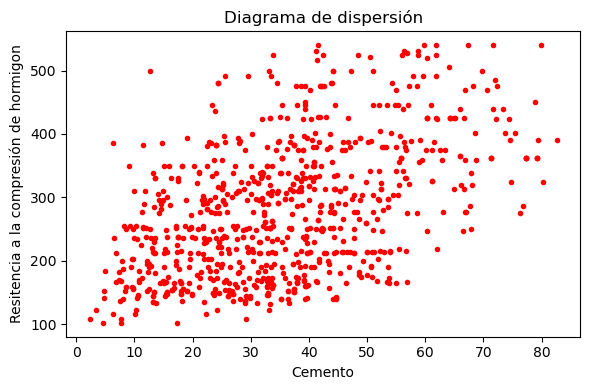

In [164]:
fig , ax = plt.subplots(figsize = (6,4))
plt.scatter(x = X_train,y=y_train,c='red',marker='.')
plt.xlabel(xlabel = var_ind)
plt.ylabel(ylabel= var_dep)
plt.title(label = 'Diagrama de dispersión',loc = 'center')
plt.tight_layout()
plt.show()

Despues de obtener el ajuste por mínimos cuadrados, surgen varias preguntas interesantes:

1.- ¿Qué tan bien se ajusta el modelo?

2.- ¿Es probable que el modelo sea útil como predictor?

3.- ¿Se viola alguna de las hipótesis básicas (como la de varianza constante y la de errores no correlacionados)? y en caso afirmativo, ¿Qué tan grave es eso?

Se deben investigar todo estos asuntos antes de adoptar al modelo en forma definitiva y usarlo.Tener en cuenta que los residuales juegan un papel clave para evaluar la adecuación del modelo.

### **Estimación de** $\sigma^2$

Primero obtenemos la suma de cuadrados de residuales, o suma de cuadrados de error:

$$SS_{res} = \sum_{i=1}^{n} {e_i^2} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

In [169]:
SS_res = np.sum(res_train**2)
SS_res

6673205.7999150865

**Estimador insesgado de** $\sigma^2$

$$\hat{\sigma}^2 = \frac{SS_{res}}{n-2} = MS_{res}$$

$MS_{res}$ se llama **cuadrado medio residual**

La raíz cuadrada de $\hat{\sigma}^2$ se llama, el **error estándar de la regresión**

In [171]:
sigma_cuadrada_est = SS_res/(len(X_train)-2)
sigma_cuadrada_est

8118.255231040252

In [172]:
MS_res = SS_res/(len(X_train) - 2)
MS_res

8118.255231040252

## **1.2 Usando SKLEARN**

In [122]:
modelo = LinearRegression()

In [123]:
modelo.fit(X = X_train, y = y_train)

LinearRegression()

Estimaciòn de $\beta_0$ y $\beta_1$

In [124]:
print("Intercepto : ",round(modelo.intercept_[0],4))
print("Coeficiente de regresión: ",round(modelo.coef_[0][0],4))
print("Coeficiente de determinacion R^2: ",round(modelo.score(X_train,y_train)*100,4))

Intercepto :  170.5114
Coeficiente de regresión:  3.0636
Coeficiente de determinacion R^2:  24.4849


Tenemos el modelo ajustado de regresión lineal simple es,

$$\hat{y} = 170.5114 + 3.0636x$$

Pruebas

In [125]:
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
y_pred = modelo.predict(X = X_test)
rmse = mean_squared_error(y_pred=y_pred,y_true=y_test)
mse = mean_squared_error(y_pred=y_pred,y_true=y_test, squared=False)
print(f'El MSE es {mse}')
print(f'El RMSE ES {rmse}')

El MSE es 92.99377677806548
El RMSE ES 8647.842519448672


## **1.3 Usando statsmodel**

In [127]:
import statsmodels.api as sm

Si `prepend` se establece **True**, la constante se agrega al principio de la matriz de datos, y si se establece en **False**, se agrega al final

In [128]:
X_train_cte = sm.add_constant(X_train,prepend=True) 
X_test_cte = sm.add_constant(X_test,prepend=True)

In [129]:
modelo_sm = sm.OLS(endog=y_train, exog=X_train_cte)
modelo_sm = modelo_sm.fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     266.5
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           4.17e-52
Time:                        22:52:33   Log-Likelihood:                -4877.0
No. Observations:                 824   AIC:                             9758.
Df Residuals:                     822   BIC:                             9767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        170.5114      7.391     23.070      0.0

In [130]:
y_pred = modelo_sm.get_prediction(exog=X_test_cte).summary_frame(alpha= 0.05)
y_pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,388.945637,7.388306,374.443469,403.447804,211.496215,566.395058
1,300.193316,3.379315,293.560214,306.826418,123.213141,477.173491
2,252.799515,3.546573,245.838110,259.760921,75.806732,429.792299
3,216.434654,4.989506,206.640982,226.228325,39.307862,393.561445
4,283.251641,3.146134,277.076238,289.427043,106.288029,460.215253


In [131]:
y_pred = modelo_sm.predict(exog=X_test_cte)
y_pred

array([388.94563669, 300.19331592, 252.79951536, 216.43465353,
       283.25164061, 340.84720949, 325.31478745, 280.03486682,
       249.39892593, 205.46698669, 323.38472318, 262.78683209,
       377.51843073, 191.77272111, 331.68706316, 270.90535643,
       344.33970675, 301.14303009, 245.07925826, 294.80139033,
       271.76316278, 230.83354575, 353.99002813, 258.13016908,
       250.34864009, 245.35498173, 382.81844851, 269.28165156,
       333.18822426, 301.14303009, 249.00065869, 218.3647178 ,
       280.06550276, 328.07202213, 292.381151  , 351.87614821,
       240.66768277, 321.24020732, 248.51048364, 303.99217259,
       208.92884801, 413.4543894 , 339.62177185, 341.55183613,
       266.24869342, 285.94760341, 271.8550706 , 290.81871801,
       252.95269507, 339.49922809, 313.51995021, 273.75449893,
       225.65607173, 397.73815172, 207.82595414, 296.27191549,
       243.39428151, 282.17938268, 321.24020732, 236.68501046,
       400.25029887, 212.51325309, 397.7994236 , 248.23

In [132]:
MSE = mean_squared_error(y_pred=y_pred, y_true=y_test)
RMSE =  mean_squared_error(y_pred=y_pred, y_true=y_test,squared=False)
print(f'El RMSE es {RMSE}')
print(f'El MSE es {MSE}')

El RMSE es 92.99377677806548
El MSE es 8647.842519448672


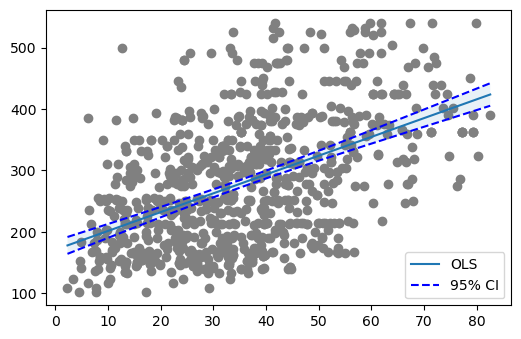

In [133]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo_sm.get_prediction(exog = X_train_cte).summary_frame(alpha=0.05)
predicciones['x'] = X_train_cte[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='blue')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();